In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
%matplotlib ipympl

## Punto 2

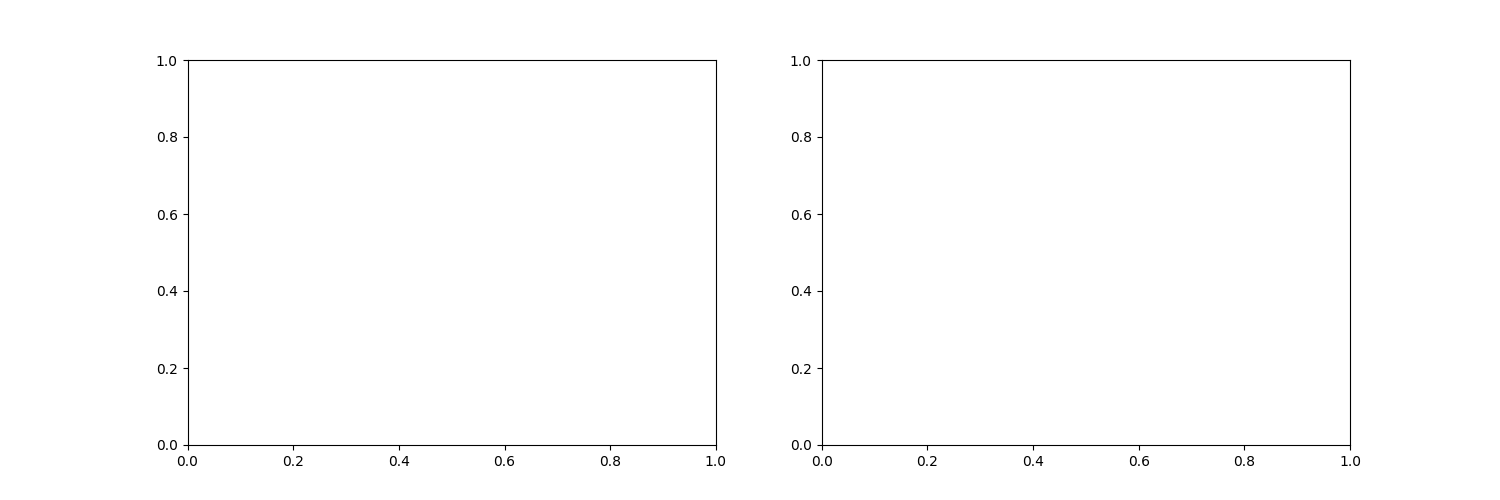

In [2]:
def eulerverlet(t,r):
    h = t[1]-t[0]
    v0 = 1
    w=np.pi
    h=t[1]-t[0]
    
    r1= r+ h*v0 + h**2 * (-w**2*r)/2 

    x = np.zeros_like(t)
    x[0] = r
    x[1] = r1
    
    for i in range(2,len(t)):
        x[i]=2*x[i-1]-x[i-2]+h**2 * -w**2 * x[i-1]
        
    return x


tmalo = np.linspace(0,50,50)
t=np.linspace(0,50,1000)
r = 1
x = eulerverlet(t,r)
xmalo = eulerverlet(tmalo,r)
def real(t):
    return 1.04943850*np.cos(np.pi*t-0.3081607)
xreal = real(t)
xrmalo = real(tmalo)

scale = 5
t1 = t[::scale]

fig= plt.figure(figsize=(15,5))
ax1= fig.add_subplot(121)
ax2=fig.add_subplot(122)


def init():
    
    ax1.clear()
    ax2.clear()
    ax1.set_xlim(-1.5,1.5)
    ax1.set_ylim(-1.5,1.5)
    
    return ax1,ax2

def Update(i):
    
    init()
    
    x0 = x[i]
    y0= 0
    cuadrado=plt.Rectangle((x0,y0),0.3,0.3)
    ax1.add_patch(cuadrado)
    posx = x[:i]
    post = t1[:i]
    rx = xreal[:i]
    ax2.scatter(post,posx,color="blue",label="verlet")
    ax2.plot(post,rx,color="red",label="real")
    ax2.legend()

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)



Aquí podemos ver el error para el estable e inestable, el inestable tiene h= 1

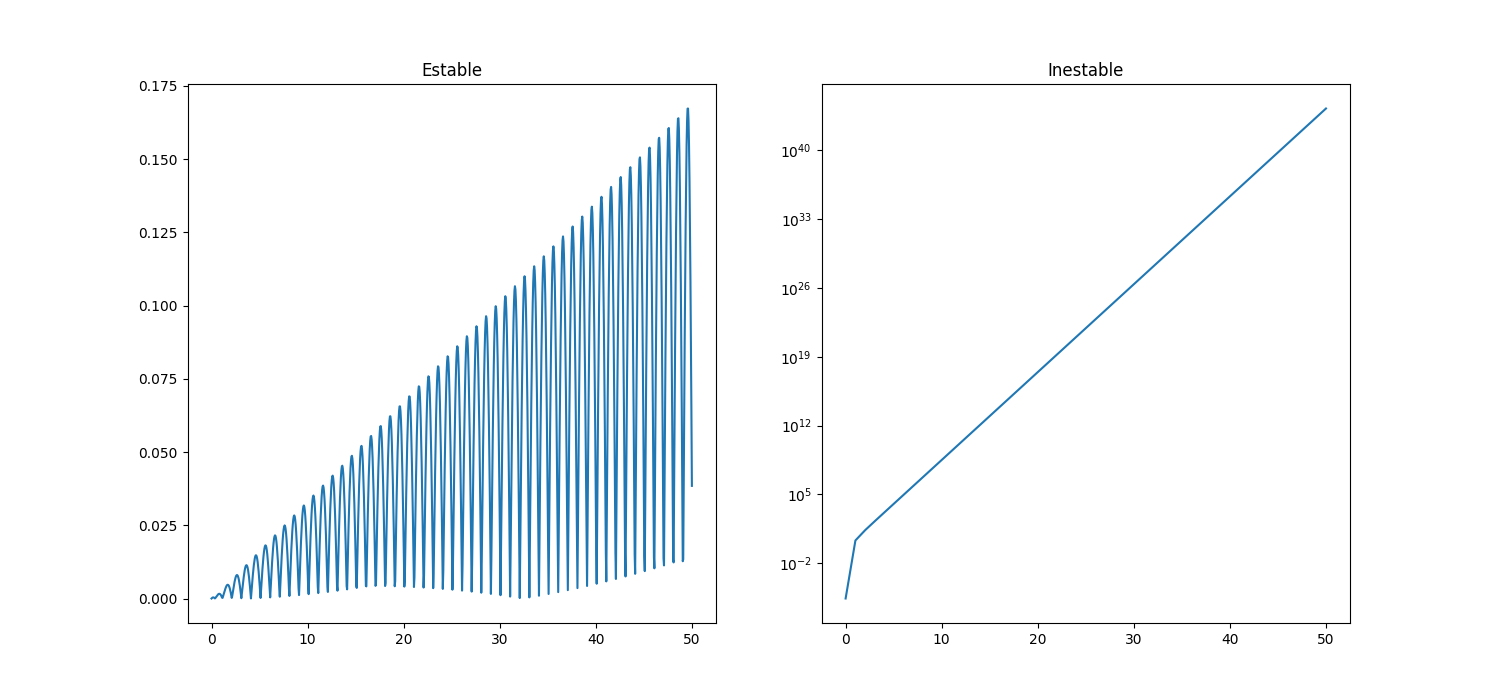

In [4]:
fig= plt.figure(figsize=(15,7))
ax3= fig.add_subplot(121)
ax4= fig.add_subplot(122)

errorbueno = abs(x-xreal)
errormalo = abs(xmalo-xrmalo)
ax3.plot(t,errorbueno)
ax3.set_title("Estable")
ax4.set_title("Inestable")
ax4.plot(tmalo,errormalo)
ax4.set_yscale('log')
